# How to fake you have watched Game of Thrones using a Fake News Classifier, Sentiment Analysis and some heuristical considerations on psychology

In this project, we want to make the psychological portrait of the GOT chracters based only on how are they talked about. In this notebook, we are performing analytics on tweets abot  GOT characters. Our choice for describing the psychological type is the [Myers-Briggs Indicator](https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator)

The Myers-Briggs Indicator takes into accout four axes:
* __E__ xtraversion <-> __I__ ntroversion
* __S__ ensing <-> i __N__ tuition
* __T__ hinking <-> __F__ eeling
* __J__ udging <-> __P__ erceiving

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

 we have previously ran __Sentiment Analysis__ and __Fake News Detection__ on tweets, and store the results in  output_prediction.csv

In [2]:
df = pd.read_csv('data/output_prediction.csv')

In [3]:
df.head()

,text,length,euron,sansa,jaime,arya,tyrion,bran,night,daenerys,cersei,jon,fakeOrNot,Sentiment
0,this new game of thrones night king theory is ...,78,0,0,0,0,0,0,1,0,0,0,0.080296,0.990070
1,congratulations for winning awards tonight wor...,96,0,0,0,0,0,0,1,0,0,0,0.024360,0.990476
2,more breaking news jinyoung of got and his vis...,109,0,0,0,0,0,0,1,0,0,0,0.470850,0.240832
3,congratulations for winning awards tonight wor...,96,0,0,0,0,0,0,1,0,0,0,0.024360,0.990476
4,congratulations for winning awards tonight wor...,96,0,0,0,0,0,0,1,0,0,0,0.024360,0.990476


## 1. Introvert vs extrovert characters

We will compare, for each character, the amount of new tweets vs retweets, the idea being that people tend to have their own opinions about extrovert characters, but they don't know much about the introverted ones, so they will mostly retweet other tweets.

Let's explore a bit our dataset. The total no of tweets:

In [4]:
len(df)

4663

without retweets:

In [5]:
len(df.drop_duplicates())

1329

In [6]:
df.drop('night',axis=1,inplace=True) # unfortunately, night is a common word, so we cannot include it in our study

In [7]:
chars = df.columns[2:-2].tolist()

In [8]:
dfNoDupl = df.drop_duplicates() #dataframe with unique tweets

Next, we create a dictionary, that we will turn into a dataframe, with the number of original tweets vs all tweets for each character:

In [9]:
charDict = {}
for char in chars:
    charDict[char]=[len(df[df[char] == 1]), len(dfNoDupl[dfNoDupl[char] == 1])]

In [10]:
charDF = pd.DataFrame(charDict,index={'all','unique'})

In [11]:
charDF

,arya,bran,cersei,daenerys,euron,jaime,jon,sansa,tyrion
unique,110,1085,150,238,6,66,404,64,129
all,67,135,82,134,6,42,237,49,88


We have to modify a little bit the dataframe for the sake of our plot:

In [12]:
charSt = charDF.stack().reset_index()
charSt.columns = ['level','name','values']

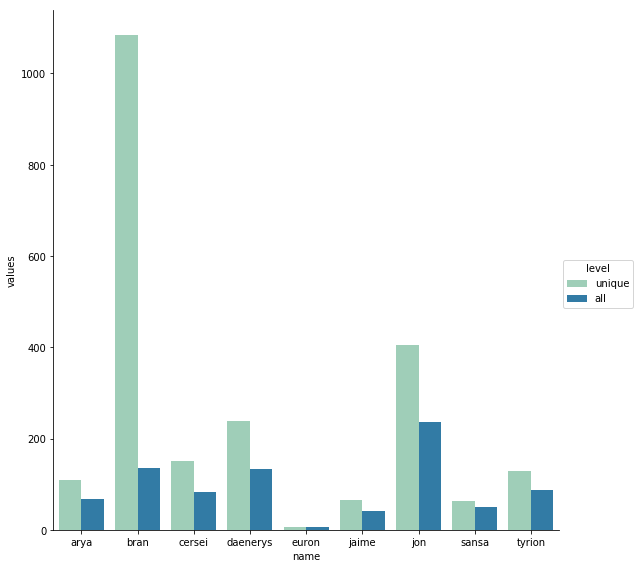

In [13]:
g = sns.factorplot(x='name',  y='values',hue='level', data=charSt,
                   size=8, kind="bar", palette="YlGnBu")
g.savefig("images/retweetProp.png")

### Conclusion: Bran and Jon are introverts, the others are Extroverts.

## 2. Dataframe manipulation for the rest of the study

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.head()

,text,length,euron,sansa,jaime,arya,tyrion,bran,daenerys,cersei,jon,fakeOrNot,Sentiment
0,this new game of thrones night king theory is ...,78,0,0,0,0,0,0,0,0,0,0.080296,0.990070
1,congratulations for winning awards tonight wor...,96,0,0,0,0,0,0,0,0,0,0.024360,0.990476
2,more breaking news jinyoung of got and his vis...,109,0,0,0,0,0,0,0,0,0,0.470850,0.240832
5,live happy day today creating my husbando jaim...,59,0,0,1,0,0,0,0,0,0,0.019901,0.992344
6,got won two awards on gaon tonight and even re...,123,0,0,0,0,0,0,0,0,0,0.106873,0.971587


Example of fake:

In [16]:
df.sort_values(by='fakeOrNot').iloc[-3,0]

'my baby done grown up from the nancy drew of drag to the daenerys stormborn targaryen of drag and i m so proud'

Example of a not fake:

In [17]:
df.sort_values(by='fakeOrNot').iloc[4,0]

'game of throne th final season will be out in days spent without got jon is not a bastard rightful'

We would like to compare fake news and sentiment with the correspondent mean values, so we will have above average sentiment/fakenews or less than average.

In [18]:


meanFakeOrNot = df.mean()['fakeOrNot']
meanSentiment = df.mean()['Sentiment']

Now, we need to construct a dataframe with mean _fakeOrNot_ and _Sentiment_ for each character:

In [19]:
avgDict = {}
for char in chars:
    avgDict[char] = [ df['fakeOrNot'][df[char] == 1].mean(),df['Sentiment'][df[char] == 1].mean()]

In [20]:
data = pd.DataFrame(avgDict, index = ['fakeOrNot', 'Sentiment'])

In [21]:
data.transpose()

,fakeOrNot,Sentiment
arya,0.149135,0.705200
bran,0.118947,0.636745
cersei,0.123288,0.543963
daenerys,0.120106,0.588087
euron,0.172555,0.473819
jaime,0.130966,0.637999
jon,0.068844,0.443692
sansa,0.179761,0.603625
tyrion,0.090714,0.646498


Merge with retweet data:

In [22]:
data = pd.merge(data.transpose(),charDF.transpose(),left_index=True, right_index=True)

In [23]:
data

,fakeOrNot,Sentiment,unique,all
arya,0.149135,0.705200,110,67
bran,0.118947,0.636745,1085,135
cersei,0.123288,0.543963,150,82
daenerys,0.120106,0.588087,238,134
euron,0.172555,0.473819,6,6
jaime,0.130966,0.637999,66,42
jon,0.068844,0.443692,404,237
sansa,0.179761,0.603625,64,49
tyrion,0.090714,0.646498,129,88


In [24]:
data1 = data.copy()

In [25]:
data1['rt_ratio'] = data1['unique'] / data1['all']

In [26]:
data1.drop(['all', 'unique'],axis=1, inplace=True)

In the end:

In [27]:
data1

,fakeOrNot,Sentiment,rt_ratio
arya,0.149135,0.705200,1.641791
bran,0.118947,0.636745,8.037037
cersei,0.123288,0.543963,1.829268
daenerys,0.120106,0.588087,1.776119
euron,0.172555,0.473819,1.000000
jaime,0.130966,0.637999,1.571429
jon,0.068844,0.443692,1.704641
sansa,0.179761,0.603625,1.306122
tyrion,0.090714,0.646498,1.465909


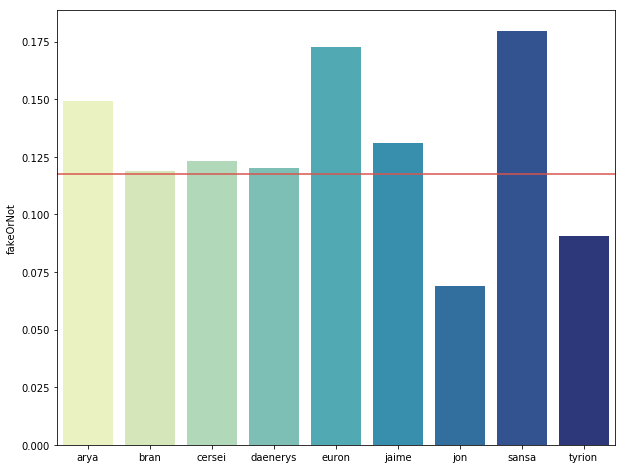

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=data1.index, y='fakeOrNot', data=data1,palette="YlGnBu")
x = plt.gca().axes.get_xlim()

plt.plot(x, len(x) * [meanFakeOrNot], sns.xkcd_rgb["pale red"])
plt.savefig("images/fakeOrNot.png")
plt.show()

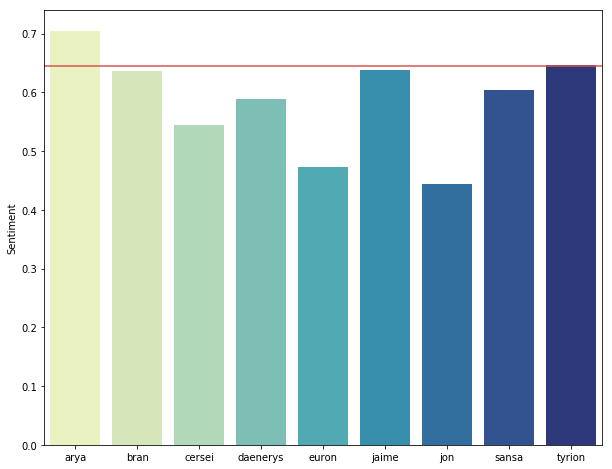

In [29]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=data1.index, y='Sentiment', data=data1,palette="YlGnBu")
x = plt.gca().axes.get_xlim()

plt.plot(x, len(x) * [meanSentiment], sns.xkcd_rgb["pale red"])
plt.savefig("images/sentiment.png")
plt.show()

Let's also have the information _greater than average_ in the dataframe

In [30]:
data1['fakePositioning'] = data1['fakeOrNot'].map(lambda x: x >= meanFakeOrNot)
data1['sentimentPositioning'] = data1['Sentiment'].map(lambda x: x >= meanSentiment)

In [31]:
data1

,fakeOrNot,Sentiment,rt_ratio,fakePositioning,sentimentPositioning
arya,0.149135,0.705200,1.641791,True,True
bran,0.118947,0.636745,8.037037,True,False
cersei,0.123288,0.543963,1.829268,True,False
daenerys,0.120106,0.588087,1.776119,True,False
euron,0.172555,0.473819,1.000000,True,False
jaime,0.130966,0.637999,1.571429,True,False
jon,0.068844,0.443692,1.704641,False,False
sansa,0.179761,0.603625,1.306122,True,False
tyrion,0.090714,0.646498,1.465909,False,True


## 3. Sensing vs Intuition

Overall sentiment gives the classification of this axis:[almost 75% of the population is sensing type](https://personalitymax.com/personality-types/preferences/sensing-intuition/) and they will dislike the abstractness of the intuitive type.

### Conclusion
* Arya and Tyrion are S, positive overall sentiment
* Bran, Cersei, Daenerys, Euron, Jaime, Jon, Sansa are N, negative overall sentiment

Next we separate tweets from High Cognitive and Low Cognitive users.

We partly base our next conclusions on the fact that people with low cognitive capacity tend to hate "low-choice" groups, e.g. roma, LGBT, who did not choose to be that way, but people high in cognitive ability express more prejudice against high-choice groups, i.e. groups that they think should be able to change their minds, e.g. conservatives, as [this study](http://journals.sagepub.com/doi/abs/10.1177/1948550616660592) reveals. 
In the Judging-Perciving dichotomy, the judging peaople are the ones with a transparent decision making process, so, if a high cognitive person will dislike someone, it will likely be a judging one. However, the ones disliked by the low cognitive persons could be both P and J. But if a GOT character is J and is disliked by low cognitive people, it will also be disliked by the high cognitives, as described above. Therefore, if a character is disliked _only_ by low cognitives, it must be a P.

We separate the dataframe in two and perform separate analysis on each of them. Fake news type of phrasing attracts especially people with reduced cognitive capacity (e.g. Romania's Antena 3), while high cognitive people are less likely to be attracted by fake news kind of discourse.


In [32]:
dfPoz = df[df['fakeOrNot'] >= meanFakeOrNot] # more of a fake news speech, less intelligent
dfNeg = df[df['fakeOrNot'] < meanFakeOrNot] #less of a fake news speech, more intelligent

In [33]:
dfPoz.head(2)

,text,length,euron,sansa,jaime,arya,tyrion,bran,daenerys,cersei,jon,fakeOrNot,Sentiment
2,more breaking news jinyoung of got and his vis...,109,0,0,0,0,0,0,0,0,0,0.470850,0.240832
33,uuu so we got trophy for tonight good job broos,47,0,0,0,0,0,0,0,0,0,0.350006,0.971470


In [34]:
avgDict = {}
for char in chars:
    avgDict[char] = [ dfPoz['fakeOrNot'][dfPoz[char] == 1].mean(),dfPoz['Sentiment'][dfPoz[char] == 1].mean()]
dataPoz = pd.DataFrame(avgDict, index = ['fakeOrNot', 'Sentiment'])

In [35]:
dataPoz = dataPoz.transpose()
dataPoz['sentimentPositioning'] = dataPoz['Sentiment'].map(lambda x: x >= meanSentiment)

In [36]:
avgDict = {}
for char in chars:
    avgDict[char] = [ dfNeg['fakeOrNot'][dfNeg[char] == 1].mean(),dfNeg['Sentiment'][dfNeg[char] == 1].mean()]
dataNeg = pd.DataFrame(avgDict, index = ['fakeOrNot', 'Sentiment'])

In [37]:
dataNeg = dataNeg.transpose()
dataNeg['sentimentPositioning'] = dataNeg['Sentiment'].map(lambda x: x >= meanSentiment)

## 4. Perceiving and Feeling

Low cognitive people will show positive sentiment towards __Feeling__  in the Feeling-Thinking axis, while showing negative sentiment towards __Perceiving__ in the Judgind-Perceiving axis, as we saw.

In [38]:
dataNeg['sentimentPositioning'][dataNeg['sentimentPositioning'] == False]

cersei      False
daenerys    False
euron       False
jon         False
tyrion      False
Name: sentimentPositioning, dtype: bool

In [39]:
dataNeg

,fakeOrNot,Sentiment,sentimentPositioning
arya,0.048972,0.711462,True
bran,0.045413,0.664949,True
cersei,0.039211,0.528404,False
daenerys,0.040522,0.550864,False
euron,0.052948,0.537135,False
jaime,0.043467,0.675256,True
jon,0.034156,0.430993,False
sansa,0.052391,0.648253,True
tyrion,0.037602,0.644527,False


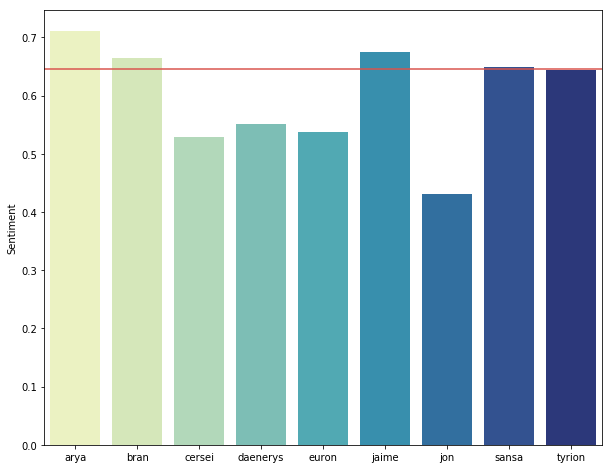

In [40]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=dataNeg.index, y='Sentiment', data=dataNeg,palette="YlGnBu")
x = plt.gca().axes.get_xlim()

plt.plot(x, len(x) * [meanSentiment], sns.xkcd_rgb["pale red"])
plt.savefig("images/thinkvsfeeling.png")
plt.show()

### Conclusion:
* Daeneris and Tyrian are F, liked by low cognitive people 
* Bran, Jaime, Sansa are P, disliked by low cognitive people

## 5. Judging and Thinking

High cognitive people will generally show positive sentiment towards __Thinking__  in the Feeling-Thinking axis, while showing negative sentiment towards __Judging__ in the Judgind-Perceiving axis. 

In [41]:
dataPoz

,fakeOrNot,Sentiment,sentimentPositioning
arya,0.340751,0.693221,True
bran,0.355633,0.545963,False
cersei,0.367515,0.589158,False
daenerys,0.384529,0.711766,True
euron,0.292163,0.410503,False
jaime,0.273153,0.577457,False
jon,0.269045,0.516986,False
sansa,0.364446,0.538915,False
tyrion,0.283595,0.653654,True


In [42]:
dataPoz['sentimentPositioning'][dataPoz['sentimentPositioning'] == False]

bran      False
cersei    False
euron     False
jaime     False
jon       False
sansa     False
Name: sentimentPositioning, dtype: bool

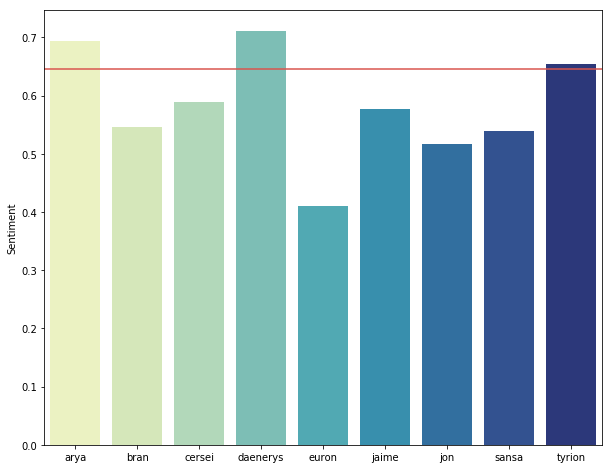

In [43]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=dataPoz.index, y='Sentiment', data=dataPoz,palette="YlGnBu")
x = plt.gca().axes.get_xlim()

plt.plot(x, len(x) * [meanSentiment], sns.xkcd_rgb["pale red"])
plt.savefig("images/judgingvsThinking.png")
plt.show()

### Conclusion
* Bran, Jaime, Sansa are Thinking, liked by high cognitive people
* Tyrion, Daenerys are J, are disliked by high cognitive people

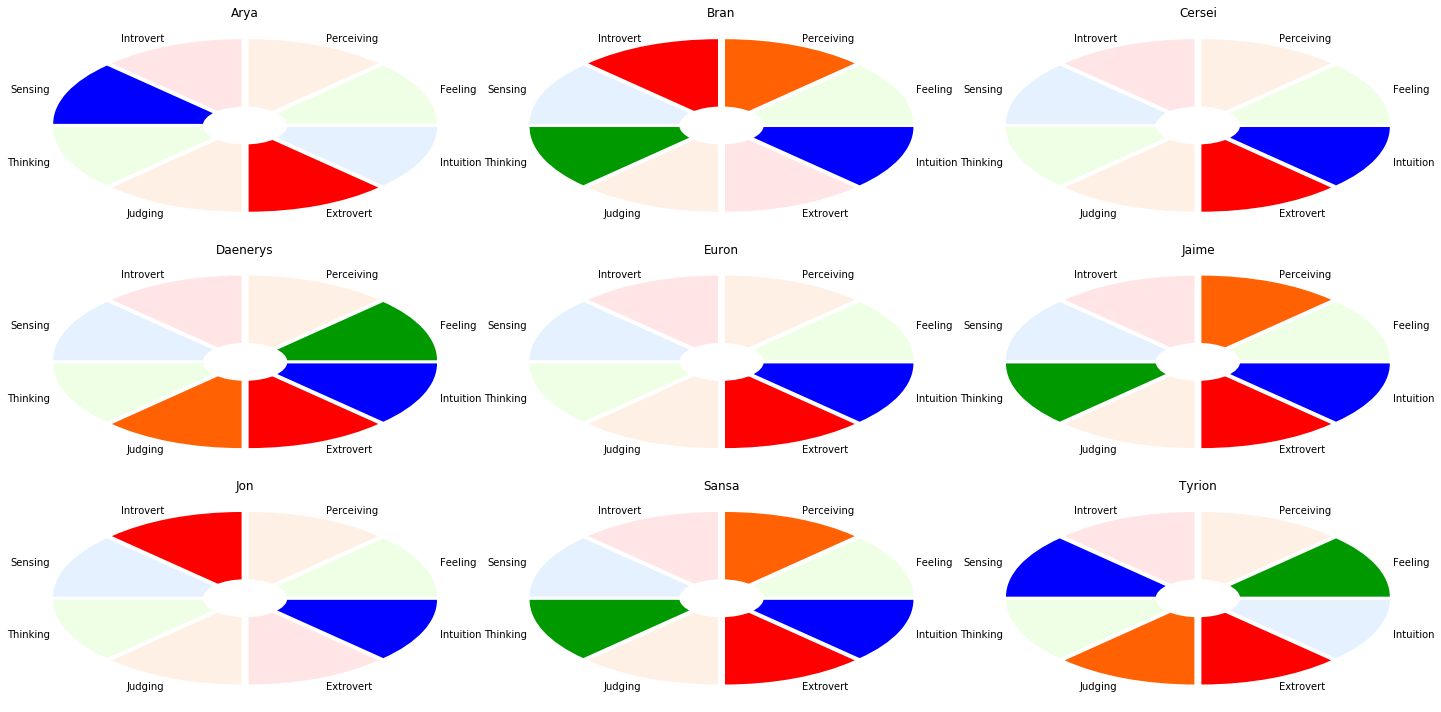

In [44]:
labels = ['Introvert', 'Sensing', 'Thinking', 'Judging',
         'Extrovert', 'Intuition', 'Feeling', 'Perceiving']
sizes = [22, 22, 22, 22, 22, 22, 22, 22]
#colors
# bright red #ff0000 light red #FFE5E5
# bright green #009900 light green #EEFFE6
# bright blue #0000ff light blue #E5F1FF
# bright orange #FF6103' light orange #FFF0E5

colorsBran = ['#ff0000','#E5F1FF','#009900','#FFF0E5',
         '#FFE5E5','#0000ff','#EEFFE6','#FF6103']

colorsArya = ['#FFE5E5','#0000ff','#EEFFE6','#FFF0E5',
         '#ff0000','#E5F1FF','#EEFFE6','#FFF0E5']

colorsCersei = ['#FFE5E5','#E5F1FF','#EEFFE6','#FFF0E5',
         '#ff0000','#0000ff','#EEFFE6','#FFF0E5']

colorsDaenerys = ['#FFE5E5','#E5F1FF','#EEFFE6','#FF6103',
         '#ff0000','#0000ff','#009900','#FFF0E5']

colorsEuron = ['#FFE5E5','#E5F1FF','#EEFFE6','#FFF0E5',
         '#ff0000','#0000ff','#EEFFE6','#FFF0E5']

colorsJaime = ['#FFE5E5','#E5F1FF','#009900','#FFF0E5',
         '#ff0000','#0000ff','#EEFFE6','#FF6103']

colorsJon = ['#ff0000','#E5F1FF','#EEFFE6','#FFF0E5',
         '#FFE5E5','#0000ff','#EEFFE6','#FFF0E5']

colorsSansa = ['#FFE5E5','#E5F1FF','#009900','#FFF0E5',
         '#ff0000','#0000ff','#EEFFE6','#FF6103']

colorsTyrion = ['#FFE5E5','#0000ff','#EEFFE6','#FF6103',
         '#ff0000','#E5F1FF','#009900','#FFF0E5']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

circleBran = plt.Circle((0,0),0.23,fc='white')
circleArya = plt.Circle((0,0),0.23,fc='white')
circleCersei = plt.Circle((0,0),0.23,fc='white')
circleDaenerys = plt.Circle((0,0),0.23,fc='white')
circleEuron = plt.Circle((0,0),0.23,fc='white')
circleJaime = plt.Circle((0,0),0.23,fc='white')
circleJon = plt.Circle((0,0),0.23,fc='white')
circleSansa = plt.Circle((0,0),0.23,fc='white')
circleTyrion = plt.Circle((0,0),0.23,fc='white')

fig = plt.figure(figsize=(20, 10))
axes = fig.subplots(nrows=3, ncols=3)

axes[0,0].pie(sizes, colors = colorsArya, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[0,0].set_title('Arya')

axes[0,1].pie(sizes, colors = colorsBran, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[0,1].set_title('Bran')

axes[0,2].pie(sizes, colors = colorsCersei, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[0,2].set_title('Cersei')


axes[1,0].pie(sizes, colors = colorsDaenerys, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[1,0].set_title('Daenerys')

axes[1,1].pie(sizes, colors = colorsEuron, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[1,1].set_title('Euron')

axes[1,2].pie(sizes, colors = colorsJaime, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[1,2].set_title('Jaime')


axes[2,0].pie(sizes, colors = colorsJon, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[2,0].set_title('Jon')

axes[2,1].pie(sizes, colors = colorsSansa, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[2,1].set_title('Sansa')

axes[2,2].pie(sizes, colors = colorsTyrion, labels=labels,  startangle=90, pctdistance=0.85, explode = explode)
axes[2,2].set_title('Tyrion')


#draw circles
axes[0,0].add_patch(circleBran)
axes[0,1].add_patch(circleArya)
axes[0,2].add_patch(circleCersei)
axes[1,0].add_patch(circleDaenerys)
axes[1,1].add_patch(circleEuron)
axes[1,2].add_patch(circleJaime)
axes[2,0].add_patch(circleJon)
axes[2,1].add_patch(circleSansa)
axes[2,2].add_patch(circleTyrion)
#plt.tight_layout()
plt.savefig("images/analysis.png")
plt.tight_layout()
plt.show()

* Arya: ESxx - can be Provider, Supervisor, Performer, Provider
* Bran: INTP -Architect
* Cersei: ENxx - can be Champion, Teacher, Inventor, Fieldmarshal
* Daenerys: ENFJ -Teacher
* Euron: ENxx - can be Champion, Teacher, Inventor, Fieldmarshal
* Jaime: ENTP -Inventor
* Jon: INxx - can be Counselor, Architect, Mastermind, Healer
* Sansa: ENTP - Inventor
* Tyrion: ESFJ -Provider